<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%203%20-%20Classification/Section%2015%20-%20K-Nearest%20Neighbors%20(K-NN)/K_NN_Classifier_on_ad_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/noushadkhan01/ML-and-DL-by-SuperDataScience.git

Cloning into 'ML-and-DL-by-SuperDataScience'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 334 (delta 122), reused 194 (delta 53), pack-reused 0
Receiving objects: 100% (334/334), 25.32 MiB | 20.13 MiB/s, done.
Resolving deltas: 100% (122/122), done.


#Get my methods need for this project

In [10]:
%cd ML-and-DL-by-SuperDataScience/my_methods
from my_dummy_variable import MyDummyVariable
from visualise_classifier_performance import visualise_classifier_performance

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/ML-and-DL-by-SuperDataScience/my_methods


In [11]:
%cd ../

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/ML-and-DL-by-SuperDataScience


In [12]:
%cd Machine-Learning/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/
!ls

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)
classification_template.py  knn.py  Social_Network_Ads.csv
classification_template.R   knn.R


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [16]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#Data Preprocessing

as we can see **User ID** is not an important column so we drop it

In [17]:
evaluation = df.loc[np.random.randint(0, len(df), 3)]
evaluation

,User ID,Gender,Age,EstimatedSalary,Purchased
130,15675185,Male,31,58000,0
74,15592877,Male,32,18000,0
84,15798659,Female,30,62000,0


In [18]:
df = df.drop(evaluation.index.values)
df.shape

(397, 5)

In [19]:
X = df.drop(['User ID', 'Purchased'], axis = 1)
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [20]:
y = df.Purchased
y[:2]

0    0
1    0
Name: Purchased, dtype: int64

In [21]:
X.head(1)

,Gender,Age,EstimatedSalary
0,Male,19,19000


## Dummy variable

In [0]:
ohe = MyDummyVariable()

In [23]:
X = ohe.fit_transform(X)
X[:2]

array([[1.0e+00, 1.9e+01, 1.9e+04],
       [1.0e+00, 3.5e+01, 2.0e+04]])

In [24]:
evaluation

,User ID,Gender,Age,EstimatedSalary,Purchased
130,15675185,Male,31,58000,0
74,15592877,Male,32,18000,0
84,15798659,Female,30,62000,0


In [25]:
evaluation_X = evaluation.drop(['User ID', 'Purchased'], axis = 1)
evaluation_X

,Gender,Age,EstimatedSalary
130,Male,31,58000
74,Male,32,18000
84,Female,30,62000


In [26]:
evaluation_X = ohe.transform(evaluation_X)
evaluation_X

array([[1.0e+00, 3.1e+01, 5.8e+04],
       [1.0e+00, 3.2e+01, 1.8e+04],
       [0.0e+00, 3.0e+01, 6.2e+04]])

In [27]:
evaluation_y = evaluation.Purchased
evaluation_y

130    0
74     0
84     0
Name: Purchased, dtype: int64

### for Better visualisation of our predictive model we are dropping Gender Column
so

In [28]:
X = X[:, 1:]
evaluation_X = evaluation_X[:, 1:]
X.shape, evaluation_X.shape

((397, 2), (3, 2))

#Visualisation

In [0]:
import seaborn as sns

In [30]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

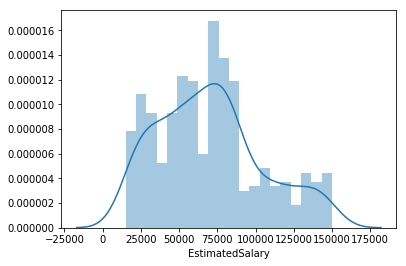

In [31]:
sns.distplot(df.EstimatedSalary, bins = 20)

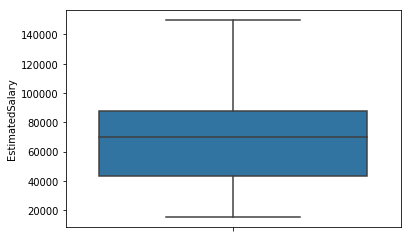

In [32]:
sns.boxplot(x = 'EstimatedSalary', orient = 'vertical', hue = 'Gender', data = df)

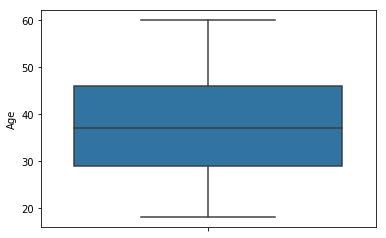

In [33]:
sns.boxplot(x = 'Age', orient = 'vertical', data = df)

#Build Model

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state  = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((317, 2), (80, 2), (317,), (80,))

##Feature scaling for accurate prediction

In [0]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_train[:2]

array([[ 2.02258636,  0.37462063],
       [-1.32825666, -0.44016318]])

In [39]:
X_test = sc_X.transform(X_test)
X_test[0]

array([-1.32825666, -0.35286491])

In [40]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

## Training dataset evaluation

In [42]:
#training classification report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       202
           1       0.85      0.91      0.88       115

    accuracy                           0.91       317
   macro avg       0.90      0.91      0.91       317
weighted avg       0.91      0.91      0.91       317



In [43]:
#confusion matrix
confusion_matrix(y_train, model.predict(X_train))

array([[184,  18],
       [ 10, 105]])

## Test set evaluation

In [44]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [45]:
confusion_matrix(y_test, model.predict(X_test))

array([[48,  4],
       [ 1, 27]])

#Visualise our model

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


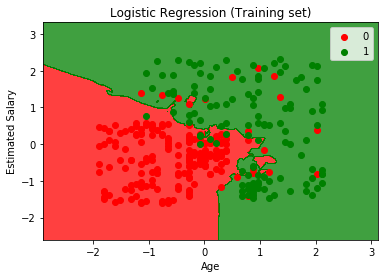

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


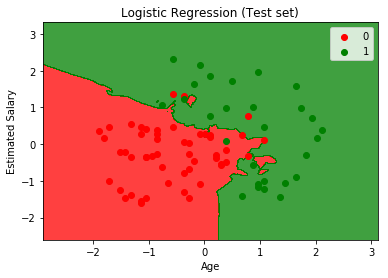

In [46]:
import warnings
warnings.filterwarnings(action = 'ignore')
visualise_classifier_performance(X_train, X_test, y_train, y_test, model)